# How to Generate FiveThirtyEight Graphs in Python

If you read data science articles, you may have already stumbled upon [FiveThirtyEight’s](https://fivethirtyeight.com/) content. Naturally, you were impressed by their [awesome visualizations](https://fivethirtyeight.com/features/the-52-best-and-weirdest-charts-we-made-in-2016/). You wanted to make your own awesome visualizations and so asked [Quora](https://www.quora.com/How-does-FiveThirtyEight-create-their-data-visualizations) and [Reddit](https://www.reddit.com/r/statistics/comments/2jon2b/anyone_knows_how_are_made_the_graphs_on/) how to do it. You received some answers, but they were rather vague. You still can’t get the graphs done yourself. In this post, we’ll help you. Using Python’s [matplotlib](https://matplotlib.org/index.html#) and [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), we’ll see that it’s rather easy to replicate the core parts of any FiveThirtyEight (FTE) visualization. We’ll start here:

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/default_graph.png" width="400" height="400" />

And, at the end of the tutorial, arrive here:

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/final3.png" width="400" height="400" />

To follow along, you’ll need at least some basic knowledge of Python. If you know what’s the difference between methods and attributes, then you’re good to go.

## Introducing the dataset

We’ll work with data describing the percentages of Bachelors conferred to women in the US from 1970 to 2011. We’ll use a dataset compiled by data scientist

[Randal Olson](https://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012/), who collected the data from the [National Center for Education Statistics](https://nces.ed.gov/about/). If you want to follow along by writing code yourself, you can download the data from [Randal’s blog](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). To save yourself some time, you can skip downloading the file, and just pass in the direct link to pandas’ `read_csv()` [function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html?highlight=read_csv#pandas.read_csv). In the following code cell, we:

- Import the pandas module.
- Read in the data by using `read_csv()`, and assign the content to `women_majors`.
- Print information about the dataset by using the `info()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html?highlight=dataframe%20info#pandas.DataFrame.info). We’re looking for the number of rows and columns, and checking for null values at the same time.
- Show the first five rows to understand better the structure of the dataset by using the `head()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html?highlight=dataframe%20head#pandas.DataFrame.head).

In [1]:
import pandas as pd

women_majors = pd.read_csv('follow.csv')
women_majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           42 non-null     int64  
 1   Agriculture                    42 non-null     float64
 2   Architecture                   42 non-null     float64
 3   Art and Performance            42 non-null     float64
 4   Biology                        42 non-null     float64
 5   Business                       42 non-null     float64
 6   Communications and Journalism  42 non-null     float64
 7   Computer Science               42 non-null     float64
 8   Education                      42 non-null     float64
 9   Engineering                    42 non-null     float64
 10  English                        42 non-null     float64
 11  Foreign Languages              42 non-null     float64
 12  Health Professions             42 non-null     float

In [2]:
women_majors.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Besides the

`Year` column, every other column name indicates the subject of a Bachelor degree. Every datapoint in the Bachelor columns represents the percentage of Bachelor degrees conferred to women. Thus, every row describes the percentage for various Bachelors conferred to women in a given year. As mentioned before, we have data from 1970 to 2011. To confirm the latter limit, let’s print the last five rows of the dataset by using the `tail()` [method:](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html?highlight=tail#pandas.DataFrame.tail)

In [3]:
women_majors.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


## The context of our FiveThirtyEight graph

Almost every FTE graph is part of an article. The graphs complement the text by illustrating a little story, or an interesting idea. We’ll need to be mindful of this while replicating our FTE graph. To avoid digressing from our main task in this tutorial, let’s just pretend we’ve already written most of an article about the evolution of gender disparity in US education. We now need to create a graph to help readers visualize the evolution of gender disparity for Bachelors where the situation was really bad for women in 1970. We’ve already set a threshold of 20%, and now we want to graph the evolution for every Bachelor where the percentage of women graduates was less than 20% in 1970. Let’s first identify those specific Bachelors. In the following code cell, we will:

- Use `.loc`, a [label-based indexer](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc), to:
    - select the first row (the one that corresponds to 1970);
    - select the items in the first row only where the values are less than 20; the `Year` field will be checked as well, but will obviously not be included because 1970 is much greater than 20.
- Assign the resulting content to `under_20`.

In [4]:
under_20 = women_majors.loc[0, women_majors.loc[0] < 20]
under_20

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64

## Using matplotlib’s default style

Let’s begin working on our graph. We’ll first take a peek at what we can build by default. In the following code block, we will:

- Run the Jupyter magic `%matplotlib` to [enable Jupyter and matplotlib work together effectively](https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1), and add `inline` to have our graphs displayed inside the notebook.
- Plot the graph by using the `plot()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) on `women_majors`. We pass in to `plot()` the following parameters:
    - `x` – specifies the column from `women_majors` to use for the x-axis;
    - `y` – specifies the columns from `women_majors` to use for the y-axis; we’ll use the index labels of `under_20` which are stored in the `.index` attribute of this object;
    - `figsize` – sets the size of the figure as a `tuple` with the format `(width, height)` in inches.
- Assign the plot object to a variable named `under_20_graph`, and print its type to show that pandas uses `matplotlib` objects under the hood.

Type: <class 'matplotlib.axes._subplots.AxesSubplot'>


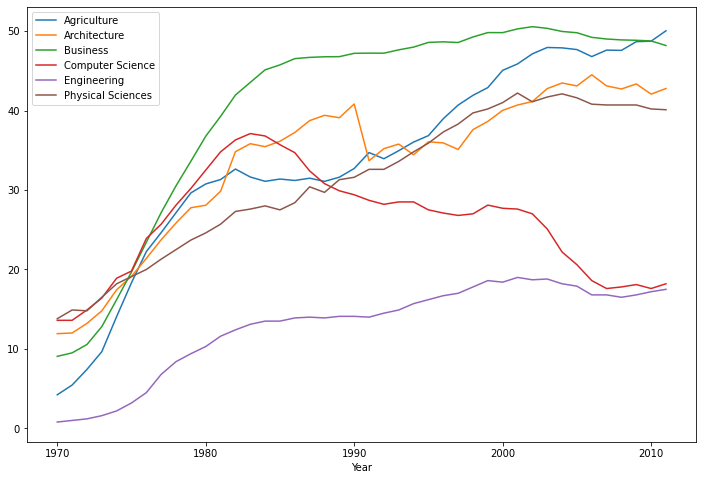

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

under_20_graph = women_majors.plot(x='Year', y=under_20.index, figsize=(12,8))
print('Type:', type(under_20_graph))

## Using matplotlib’s fivethirtyeight style

The graph above has certain characteristics, like the width and color of the spines, the font size of the y-axis label, the absence of a grid, etc. All of these characteristics make up matplotlib’s default style. As a short parenthesis, it’s worth mentioning that we’ll use a few technical terms about the parts of a graph throughout this post. If you feel lost at any point, you can refer to the legend below.

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/anatomy1.png" width="400" height="400" />
Source: [Matplotlib.org](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

Besides the default style, matplotlib comes with several built-in styles that we can use readily. To see a list of the available styles, we will:

- Import the `matplotlib.style` [module](https://matplotlib.org/api/style_api.html?highlight=style%20available#module-matplotlib.style) under the name `style`.
- Explore the content of `matplotlib.style.available` (a - predefined variable of this module), which contains a list of all the available in-built styles.

In [6]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

You might have already observed that there’s a built-in style called

`fivethirtyeight`. Let’s use this style, and see where that leads. For that, we’ll use the aptly named `use()` [function](https://matplotlib.org/api/style_api.html?highlight=style%20available#matplotlib.style.use) from the same `matplotlib.style` module (which we imported under the name `style`). Then we’ll generate our graph using the same code as earlier.

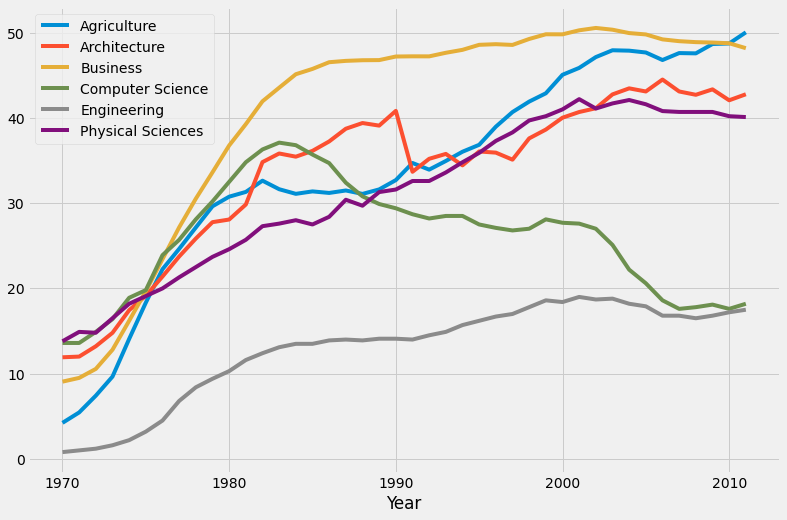

In [7]:
style.use('fivethirtyeight')
women_majors.plot(x='Year', y=under_20.index, figsize=(12,8))

plt.show()

Wow, that’s a major change! With respect to our first graph, we can see that this one has a different background color, it has grid lines, there are no spines whatsoever, the weight and the font size of the major tick labels are different, etc. You can read a technical description of the `fivethirtyeight` style [here](https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle) – it should also give you a good idea about what code runs under the hood when we use this style. The author of the style sheet, [Cameron David-Pilon](https://github.com/CamDavidsonPilon), discusses some of the characteristics [here
(https://dataorigami.net/blogs/napkin-folding/17543615-replicating-538s-plot-styles-in-matplotlib).

## The limitations of matplotlib’s fivethirtyeight style

All in all, using the

`fivethirtyeight` style clearly brings us much closer to our goal. Nonetheless, there’s still a lot left to do. Let’s examine a simple FTE graph, and see what else we need to add to our graph.

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/fandango.png" width="400" height="400" />

Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

By comparing the above graph with what we’ve made so far, we can see that we still need to:

- Add a title and a subtitle.
- Remove the block-style legend, and add labels near the relevant plot lines. We’ll also have to make the grid lines transparent around these labels.
- Add a signature bottom bar which mentions the author of the graph and the source of the data.
- Add a couple of other small adjustments:
    - increase the font size of the tick labels;
    - add a “%” symbol to one of the major tick labels of the y-axis;
    - remove the x-axis label;
    - bold the horizontal grid line at y = 0;
    - add an extra grid line next to the tick labels of the y-axis;
    - increase the lateral margins of the figure.
    
<img src="https://www.dataquest.io/wp-content/uploads/2019/01/adjustments.png" width="400" height="400" />

Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

To minimize the time spent with generating the graph, it’s important to avoid beginning adding the title, the subtitle, or any other text snippet. In matplotlib, a text snippet is positioned by specifying the x and y coordinates, as we’ll see in some of the sections below. To replicate in detail the FTE graph above, notice that we’ll have to align vertically the tick labels of the y-axis with the title and the subtitle. We want to avoid a situation where we have the vertical alignment we want, lost it by increasing the font size of the tick labels, and then have to change the position of the title and subtitle again.

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/adjustments.png" width="400" height="400" />

Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

For teaching purposes, we’re now going to proceed incrementally with adjusting our FTE graph. Consequently, our code will span over multiple code cells. In practice, however, no more than one code cell will be required.

## Customizing the tick labels

We’ll start by increasing the font size of the tick labels. In the following code cell, we:

- Plot the graph using the same code as earlier, and assign the resulting object to `ax` object. Assigning to a variable allows us to repeatedly and easily apply methods on the object, or access its attributes.
- Increase the font size of all the major tick labels using the `tick_params()` [method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html?highlight=tick_params#matplotlib.axes.Axes.tick_params) with the following parameters:
    - `axis` – specifies the axis that the tick labels we want to modify belong to; here we want to modify the tick labels of both axes;
    - `which` – indicates what tick labels to be affected (the major or the minor ones; see the legend shown earlier if you don’t know the difference);
    - `labelsize` – sets the font size of the tick labels.

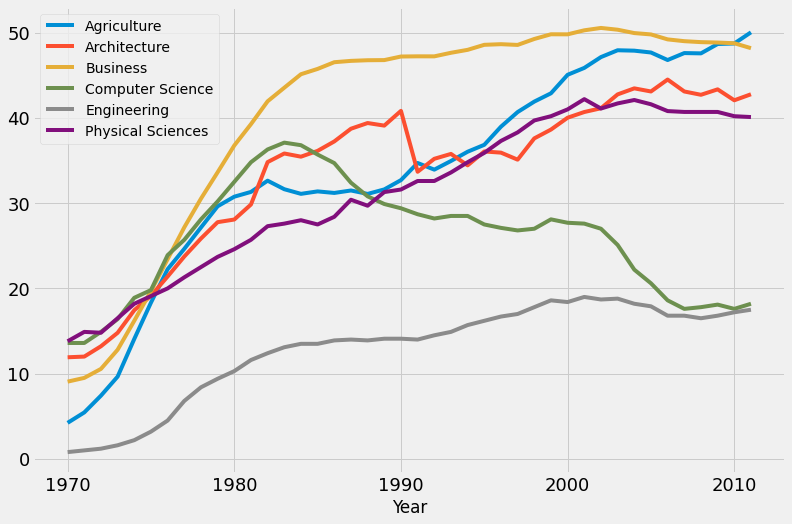

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)

You may have noticed that we didn’t use `style.use('fivethirtyeight')` this time. That’s because the preference for any matplotlib style becomes global once it’s first declared in our code. We’ve set the style earlier as `fivethirtyeight`, and from there on all subsequent graphs inherit this style. If for some reason you want to return to the default state, just run `style.use('default')`. We’ll now build upon our previous changes by making a few adjustments to the tick labels of the y-axis:

- We add a “%” symbol to 50, the highest visible tick label of the y-axis.
- We also add a few whitespace characters after the other visible labels to align them elegantly with the new “50%” label.

To make these changes to the tick labels of the y-axis, we’ll use the

`set_yticklabels()` [method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html?highlight=set_yticklabels#matplotlib.axes.Axes.set_yticklabels) along with the `label` parameter. As you can deduce from the code below, this parameter can take in a list of mixed data types, and doesn’t require any fixed number of labels to be passed in.

In [9]:
# Customizing the tick labels of the y-axis using ax.set_yticklabels (labels = ['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
print('The actual tick labels of the y-axis:', ax.get_yticks())

The actual tick labels of the y-axis: [-10.   0.  10.  20.  30.  40.  50.  60.]


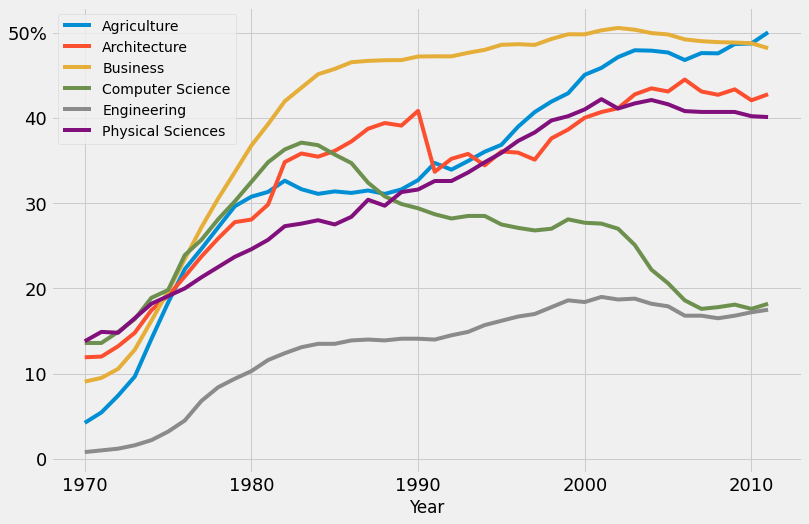

In [10]:
# The previous code
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)

# Customize the y-ticks and exclude the first and last element (i.e. -10 and 60)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels=['0', '10', '20', '30', '40', '50%'])

plt.show()

## Bolding the horizontal line at y = 0

We will now bold the horizontal line where the y-coordinate is 0. For that, we’ll use the

`axhline()` [method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html?highlight=axhline#matplotlib.axes.Axes.axhline) to add a new horizontal grid line, and cover the existing one. The parameters we use for `axhline()` are:

- `y` – specifies the y-coordinate of the horizontal line;
- `color` – indicates the color of the line;
- `linewidth` – sets the width of the line;
- `alpha` – regulates the transparency of the line, but we use it here to regulate the intensity of the black color; the values for `alpha` range from 0 (completely transparent) to 1 (completely opaque).

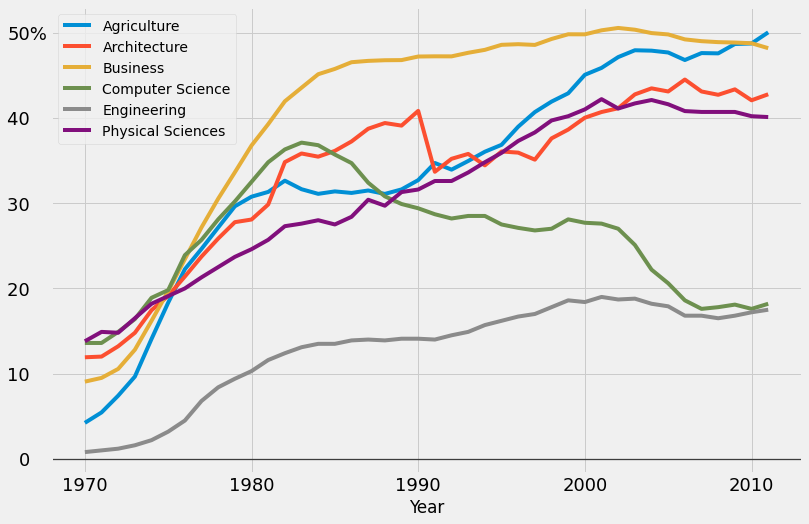

In [11]:
# The previous code
# Note this time the ticks and the labels are set using 'axis.Axis.set_ticks()' method
# also note the spaces in the labels for alignment with '50%'
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

# Generate a bolded horizontal line at y = 0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

plt.show()

## Add extra vertical line

As we mentioned earlier, we have to add another vertical grid line in the immediate vicinity of the tick labels of the y-axis. For that, we simply tweak the range of the values of the x-axis. Increasing the range’s left limit will result in the extra vertical grid line we want. Below, we use the

`set_xlim()` [method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html?highlight=set_xlim#matplotlib.axes.Axes.set_xlim) with the self-explanatory parameters `left` and `right`.

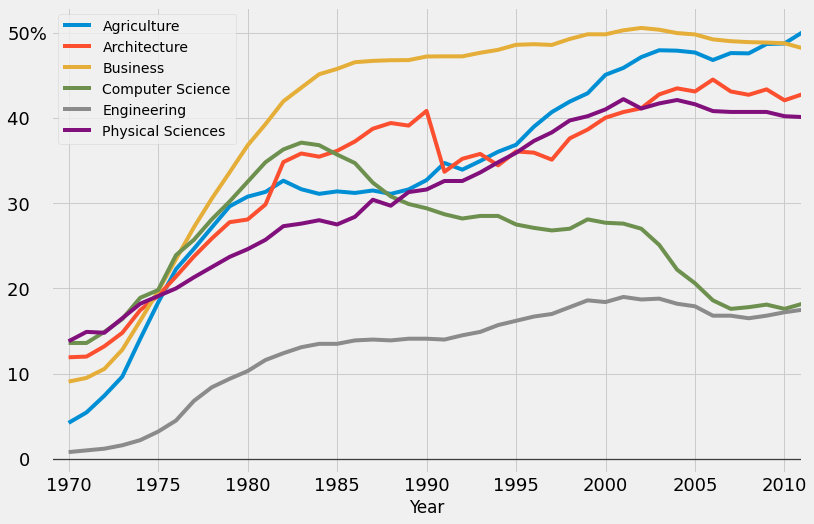

In [12]:
# The previous code
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

# Add extra vertical lines by tweaking the range of the x-axis
ax.set_xlim(left=1969, right=2011)

plt.show()

## Generating a signature bar

The signature bar of the example FTE graph presented above has a few obvious characteristics:

- It’s positioned at the bottom of the graph.
- The author’s name is located on the left side of the signature bar.
- The source of the data is mentioned on the right side of the signature bar.
- The text has a light grey color (the same as the background color of the graph), and a dark grey background.
- The area in-between the author’s name and the source name has a dark grey background as well.

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/fandango-1.png" width="400" height="400" />

The image is posted again so you don’t have to scroll back. Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

It may seem difficult to add such a signature bar, but with a little ingenuity we can get it done quite easily. We’ll add a single snippet of text, give it a light grey color, and a background color of dark grey. We’ll write both the author’s name and the source in a single text snippet, but we’ll space out these two such that one ends up on the far left side, and the other on the far right. The nice thing is that the whitespace characters will get a dark grey background as well, which will create the effect of a signature bar. We’ll also use some white space characters to align the author’s name and the name of the source, as you’ll be able to see in the next code block. This is also a good moment to remove the label of the x-axis. This way, we can get a better visual sense of how the signature bar fits in the overall scheme of the graph. In the next code cell, we’ll build up on what we’ve done so far, and we will:

- Remove the label of the x-axis by passing in a `False` value to the `set_visible()` method we apply to the object `ax.xaxis.label`. Think of it this way: we access the `xaxis` attribute of `fte_graph`, and then we access the `label` attribute of `ax.xaxis`. Then we finally apply `set_visible()` to `ax.xaxis.label`.
- Add a snippet of text on the graph in the way discussed above. We’ll use the `text()` [method](https://matplotlib.org/api/figure_api.html?highlight=figure%20text#matplotlib.figure.Figure.text) with the following parameters:
    - `x` – specifies the x-coordinate of the text;
    - `y` – specifies the y-coordinate of the text;
    - `s` – indicates the text to be added;
    - `fontsize` – sets the size of the text;
    - `color` – specifies the color of the text; the format of the value we use below is [hexadecimal](https://en.wikipedia.org/wiki/Hexadecimal); we use this format to match exactly the background color of the entire graph (as specified in [the code of the fivethirtyeight style](https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle));
    - `backgroundcolor` – sets the background color of the text snippet.

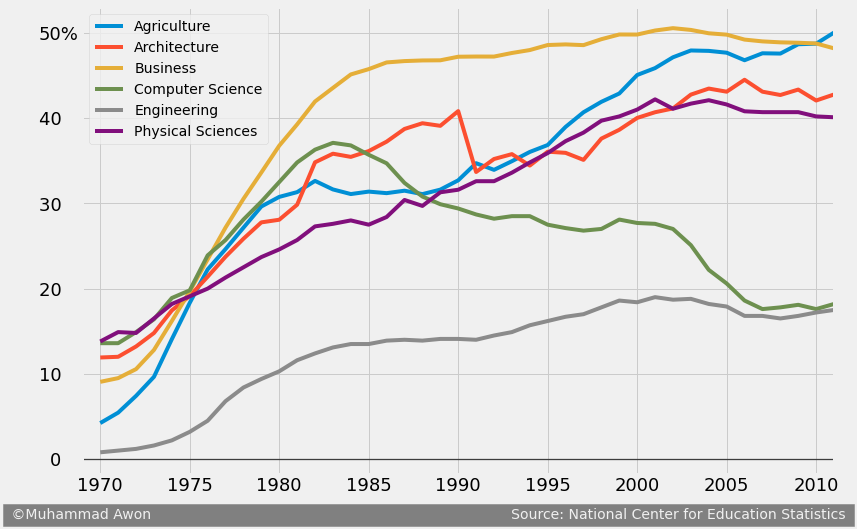

In [21]:
# The previous code
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
ax.set_xlim(left=1969, right=2011)

# Remove the label of the x-axis
ax.xaxis.label.set_visible(False)

# The signature bar
ax.text(x=1964.8, y=-7,
        color='#f0f0f0',
        backgroundcolor='grey',
        fontsize=14,
        s=' ©Muhammad Awon' +' '*80 + 'Source: National Center for Education Statistics ')

plt.show()

## A different kind of signature bar

You’ll also meet a slightly different kind of signature bar:

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/olympics1.png" width="400" height="400" />

Source: [FiveThirtyEight](https://fivethirtyeight.com/features/old-olympians-ride-horses-young-ones-do-flips/) This kind of signature bar can be replicated quite easily as well. We’ll just add some grey colored text, and a line right above it. We’ll create the visual effect of a line by adding a snippet of text of multiple underscore characters (“_”). You might wonder why we’re not using `axhline()` to simply draw a horizontal line at the y-coordinate we want. We don’t do that because the new line will drag down the entire grid of the graph, and this won’t create the desired effect. We could also try adding an arrow, and then remove the pointer so we end up with a line. However, the “underscore” solution is much simpler. In the next code block, we implement what we’ve just discussed. The methods and parameters we use here should already be familiar from earlier sections.

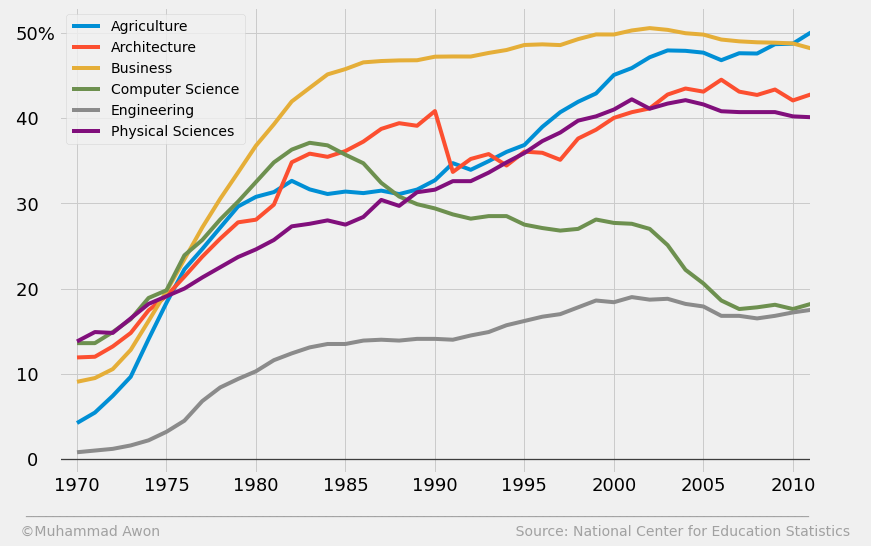

In [20]:
# The previous code
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
ax.set_xlim(left=1969, right=2011)
ax.xaxis.label.set_visible(False)

# The other signature bar
ax.text(x = 1967.1, y = -6.5,
    s = '________________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

ax.text(x = 1966.1, y = -9,
    s = '   ©Muhammad Awon                                                                               Source: National Center for Education Statistics   ',
    fontsize = 14, color = 'grey', alpha = .7)

plt.show()

## Adding a title and subtitle

If you examine [a couple of FTE graphs](https://fivethirtyeight.com/features/the-52-best-and-weirdest-charts-we-made-in-2016/), you may notice these patterns with regard to the title and the subtitle:

- The title is almost invariably complemented by a subtitle.
- The title gives a contextual angle to look from at a particular graph. The title is almost never technical, and it usually expresses a single, simple idea. It’s also almost never emotionally-neutral. In the Fandango graph above, we can see a simple, “emotionally-active” title (“Fandango LOVES Movies”), and not a bland “The distribution of various movie rating types”.
- The subtitle offers technical information about the graph. This information is what makes axis labels redundant oftentimes. We should be careful to customize our subtitle accordingly since we’ve already dropped the x-axis label.
- Visually, the title and the subtitle have different font weights, and they are left-aligned (unlike most titles, which are centered). Also, they are aligned vertically with the major tick labels of the y-axis, as we showed earlier.

Let’s now add a title and a subtitle to our graph while being mindful of the above observations. In the code block below, we’ll build upon what we’ve coded so far, and we will:

- Add a title and a subtitle by using the same `text()` method we used to add text in the signature bar. If you already have some experience with matplotlib, you might wonder why we don’t use the `title()` and `suptitle()` methods. This is because these two methods have an awful functionality with regard to moving text with precision. The only new parameter for `text()` is `weight`. We use it to bold the title.

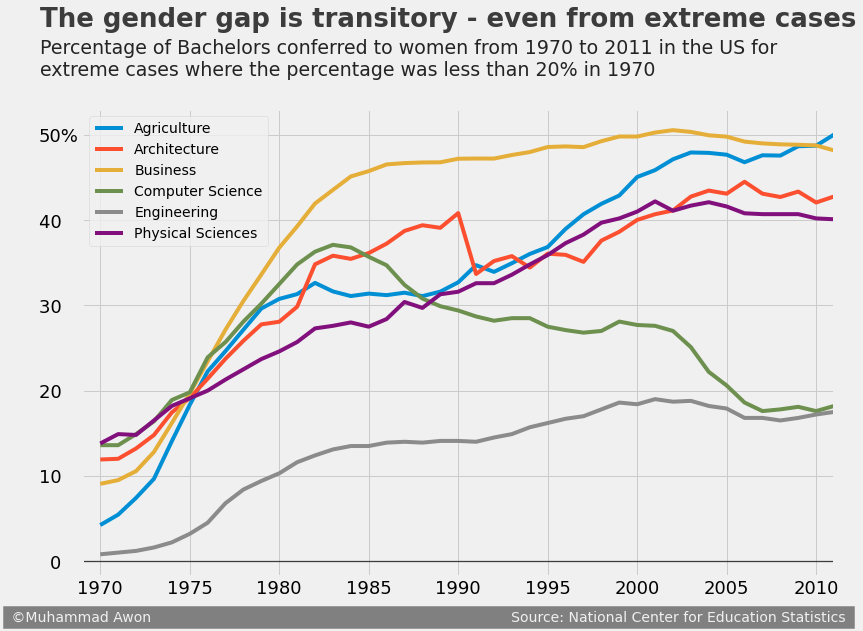

In [19]:
# The previous code
fig, ax = plt.subplots(figsize=(12,8))

women_majors.plot(x='Year', y=under_20.index, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
ax.set_xlim(left=1969, right=2011)
ax.xaxis.label.set_visible(False)
ax.text(x=1964.8, y=-7,
        color='#f0f0f0',
        backgroundcolor='grey',
        fontsize=14,
        s=' ©Muhammad Awon' +' '*80 + 'Source: National Center for Education Statistics ')

# Adding a title and a subtitle
ax.text(x=1966.65, y=62.7,
        fontsize=26, weight='bold',
        alpha=.75, s='The gender gap is transitory - even from extreme cases')
ax.text(x=1966.65, y=57,
        fontsize=19, alpha=.85,
        s='Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970')

plt.show()

In case you were wondering, the font used in the original FTE graphs is Decima Mono, a paywalled font. For this reason, we’ll stick with Matplotlib’s default font, which looks pretty similar anyway.

## Adding colorblind-friendly colors

Right now, we have that clunky, rectangular legend. We’ll get rid of it, and add colored labels near each plot line. Each line will have a certain color, and a word of an identical color will name the Bachelor which that line corresponds to. First, however, we’ll modify the default colors of the plot lines, and add [colorblind-friendly](https://en.wikipedia.org/wiki/Color_blindness) colors:

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/cb_friendly.jpg" width="400" height="400" />

Source: [Points of View: Color blindness by Bang Wong](https://www.nature.com/nmeth/journal/v8/n6/full/nmeth.1618.html#ref1) We’ll compile a list of [RGB](https://en.wikipedia.org/wiki/RGB_color_model) parameters for colorblind-friendly colors by using values from the above image. As a side note, we avoid using yellow because text snippets with that color are not easily readable on the graph’s dark grey background color. After compiling this list of RGB parameters, we’ll then pass it to the `color` parameter of the `plot()` method we used in our previous code. Note that matplotlib will require the RGB parameters to be within a 0-1 range, so we’ll divide every value by 255, the maximum RGB value. We won’t bother dividing the zeros because 0/255 = 0.

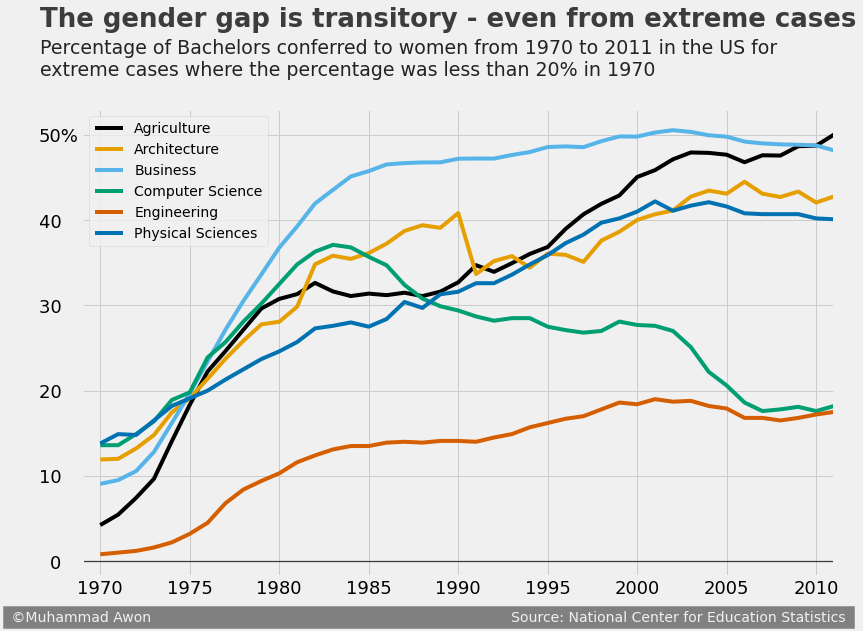

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# The previous code we modify
women_majors.plot(x='Year', y=under_20.index, ax=ax, color=colors)

# The previous code that remains the same
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
ax.set_xlim(left=1969, right=2011)
ax.xaxis.label.set_visible(False)
ax.text(x=1964.8, y=-7,
        color='#f0f0f0',
        backgroundcolor='grey',
        fontsize=14,
        s=' ©Muhammad Awon' +' '*80 + 'Source: National Center for Education Statistics ')
ax.text(x=1966.65, y=62.7,
        fontsize=26, weight='bold',
        alpha=.75, s='The gender gap is transitory - even from extreme cases')
ax.text(x=1966.65, y=57,
        fontsize=19, alpha=.85,
        s='Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970')

plt.show()

## Changing the legend style by adding colored labels

Finally, we add colored labels to each plot line by using the `text()` method used earlier. The only new parameter is `rotation`, which we use to rotate each label so that it fits elegantly on the graph. We’ll also do a little trick here, and make the grid lines transparent around labels by simply modifying their background color to match that of the graph. In our previous code we only modify the `plot()` method by setting the `legend` parameter to `False`. This will get us rid of the default legend. We also skip redeclaring the `colors` list since it’s already stored in memory from the previous cell.

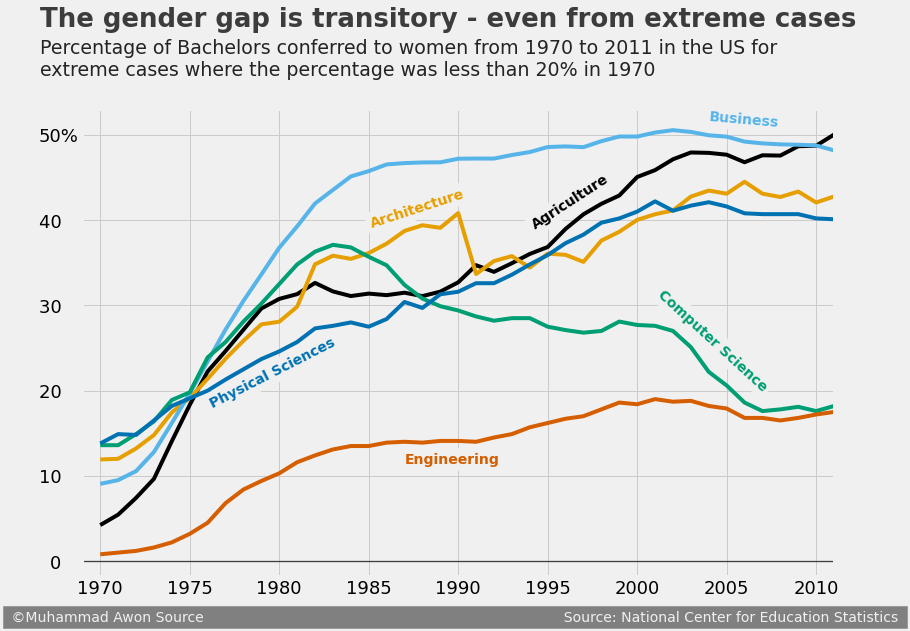

In [17]:
# The previous code we modify
fig, ax = plt.subplots(figsize=(12,8))

# The previous code that remains unchanged
women_majors.plot(x='Year', y=under_20.index, ax=ax, color=colors, legend=False) # legend=False
ax.tick_params(axis='both', which='major', labelsize=18)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
ax.set_xlim(left=1969, right=2011)
ax.xaxis.label.set_visible(False)
ax.text(x=1964.8, y=-7,
        color='#f0f0f0',
        backgroundcolor='grey',
        fontsize=14,
        s=' ©Muhammad Awon Source' +' '*80 + 'Source: National Center for Education Statistics ')
ax.text(x=1966.65, y=62.7,
        fontsize=26, weight='bold',
        alpha=.75, s='The gender gap is transitory - even from extreme cases')
ax.text(x=1966.65, y=57,
        fontsize=19, alpha=.85,
        s='Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970')

# Add colored labels
ax.text(x=1994, y=39, s='Agriculture', color=colors[0], weight='bold', rotation=33,
        backgroundcolor='#f0f0f0')
ax.text(x=1985, y=39.2, s='Architecture', color=colors[1], weight='bold', rotation=18,
        backgroundcolor='#f0f0f0')
ax.text(x=2004, y=51, s='Business', color=colors[2], weight='bold', rotation=-5,
        backgroundcolor='#f0f0f0')
ax.text(x=2001, y=20, s='Computer Science', color=colors[3], weight='bold', rotation=-42.5,
        backgroundcolor='#f0f0f0')
ax.text(x=1987, y=11.5, s='Engineering', color=colors[4], weight='bold',
        backgroundcolor='#f0f0f0')
ax.text(x=1976, y=18, s='Physical Sciences', color=colors[5], weight='bold', rotation=27,
        backgroundcolor='#f0f0f0')

plt.show()

## Next steps

That’s it, our graph is now ready for publication! To do a short recap, we’ve started with generating a graph with matplotlib’s default style. We then brought that graph to “FTE-level” through a series of steps:

- We used matplotlib’s in-built `fivethirtyeight style`.
- We added a title and a subtitle, and customized each.
- We added a signature bar.
- We removed the default legend, and added colored labels.
- We made a series of other small adjustments: customizing the tick labels, bolding the horizontal line at y = 0, adding a vertical grid line near the tick labels, removing the label of the x-axis, and increasing the lateral margins of the y-axis.

To build upon what you’ve learned, here are a few next steps to consider:

- Generate a similar graph for other Bachelors.
- Generate different kinds of FTE graphs: a histogram, a scatter plot etc.
- Explore [matplotlib’s gallery](https://matplotlib.org/gallery.html) to search for potential elements to enrich your FTE graphs (like inserting images, or adding arrows etc.). Adding images can take your FTE graphs to a whole new level:

<img src="https://www.dataquest.io/wp-content/uploads/dinos1.png" width="400" height="400" />

Source: [FiveThirtyEight](https://fivethirtyeight.com/features/the-biggest-dinosaur-in-history-may-never-have-existed/)

## Put Everything in Together

Below is the complete code of all the steps we have taken to produce the graph along with comments.

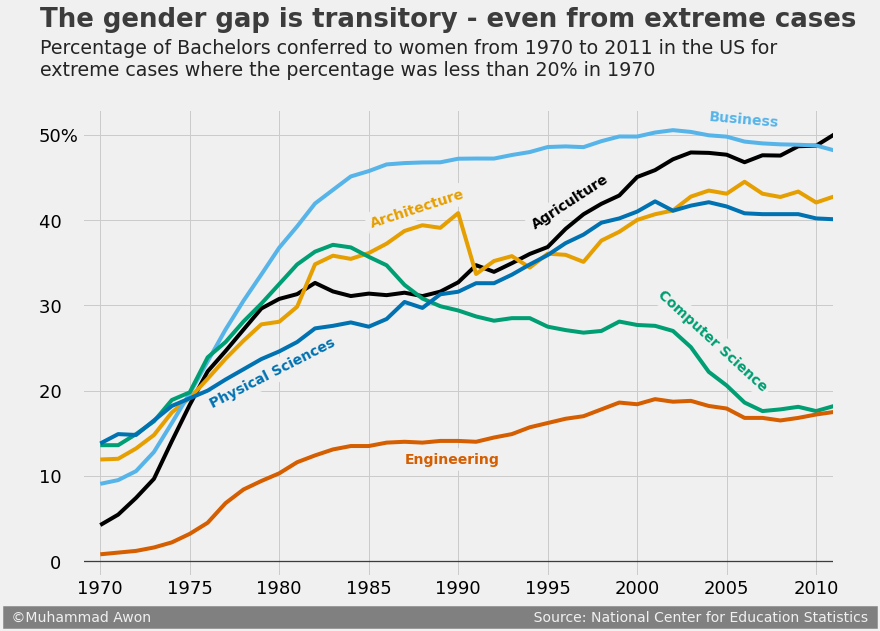

In [24]:
# Set graph style
style.use('fivethirtyeight')

# Create figure and axes object
fig, ax = plt.subplots(figsize=(12,8))

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]
# Create line plot (legend=False to disable)
women_majors.plot(x='Year', y=under_20.index, ax=ax, color=colors, legend=False)

# Change the fontsize of 'major' ticks on both x and y axes
ax.tick_params(axis='both', which='major', labelsize=18)
# Customize the y-axis ticks and exclude the first and last element (i.e. -10 and 60)
ax.yaxis.set_ticks(ticks=ax.get_yticks()[1:-1], labels=['0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
# Generate a bolded horizontal line at y = 0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)
# Add extra vertical lines by tweaking the range of the x-axis
ax.set_xlim(left=1969, right=2011)
# Remove the label of the x-axis
ax.xaxis.label.set_visible(False)

# The signature bar
ax.text(x=1964.8, y=-7,
        color='#f0f0f0',
        backgroundcolor='grey',
        fontsize=14,
        s=' ©Muhammad Awon' +' '*85 + 'Source: National Center for Education Statistics ')

# Adding a title and a subtitle
ax.text(x=1966.65, y=62.7,
        fontsize=26, weight='bold',
        alpha=.75, s='The gender gap is transitory - even from extreme cases')
ax.text(x=1966.65, y=57,
        fontsize=19, alpha=.85,
        s='Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970')

# Add colored labels
ax.text(x=1994, y=39, s='Agriculture', color=colors[0], weight='bold', rotation=33,
        backgroundcolor='#f0f0f0')
ax.text(x=1985, y=39.2, s='Architecture', color=colors[1], weight='bold', rotation=18,
        backgroundcolor='#f0f0f0')
ax.text(x=2004, y=51, s='Business', color=colors[2], weight='bold', rotation=-5,
        backgroundcolor='#f0f0f0')
ax.text(x=2001, y=20, s='Computer Science', color=colors[3], weight='bold', rotation=-42.5,
        backgroundcolor='#f0f0f0')
ax.text(x=1987, y=11.5, s='Engineering', color=colors[4], weight='bold',
        backgroundcolor='#f0f0f0')
ax.text(x=1976, y=18, s='Physical Sciences', color=colors[5], weight='bold', rotation=27,
        backgroundcolor='#f0f0f0')

plt.show()